In [1]:
from IPython.display import display, Markdown, Latex

from product import Option
from strategy import *
from euronext import Page
from graph import Graph

g=Graph(4800, 5500, 25)
p = Page(ticker_idx=1)
p.fetch()
options = p.scrap_options()
call = p.call
put = p.put
for k, o in p.call.items():
    o.multiplier=10
for k, o in p.put.items():
    o.multiplier=10


In [ ]:
bspread = BoxSpread(call[5000], call[4950], put[5100], put[5150])
g.profit_strategy(bspread)
print('Cost-BoxSpread : {:0.02f}€'.format(bspread.cost()))
g.display_summary(bspread)

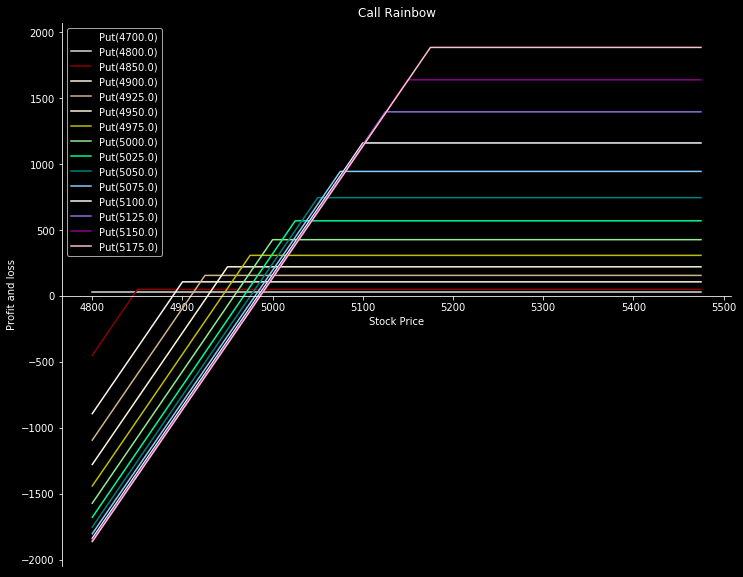

In [9]:
g.profit_rainbow(put.values(), 'short', title='Call Rainbow')

In [ ]:
from analyse import pivot_sr

H = 5140.45
B = 4986.19
C = 5025.20
for k, v in pivot_sr(H, B, C).items():
    print('{} {}'.format(k,v))

### Semaine 46 : 19 nov au 23 nov
- 1 $\sigma$ [4875 - 5175]
- 2 $\sigma$ [4750 - 5300]
- Pivot 5050
- SR1 [4960 - 5115]
- SR2 [4896 - 5204]
- SR3 [4806 - 5269]

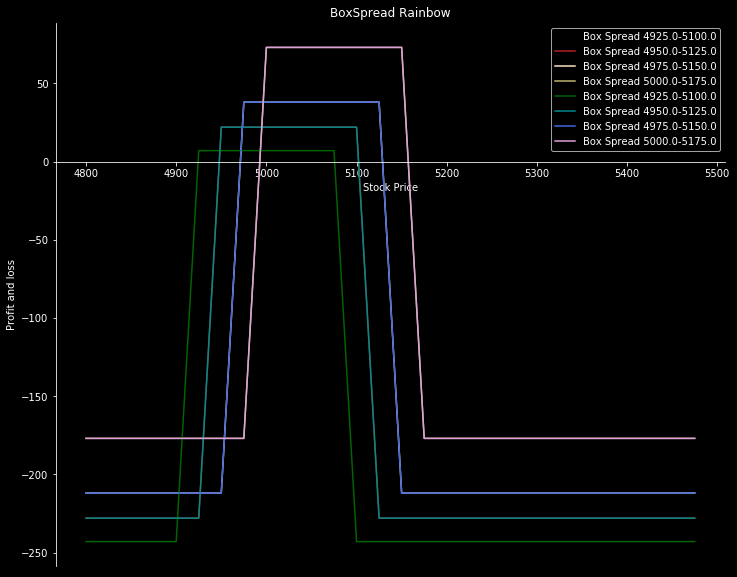

In [4]:
bss = BoxSpread.explorator(call.values(), put.values(), spread=50, gap=150)
g.profit_rainbow(bss, 'long', title='BoxSpread Rainbow')

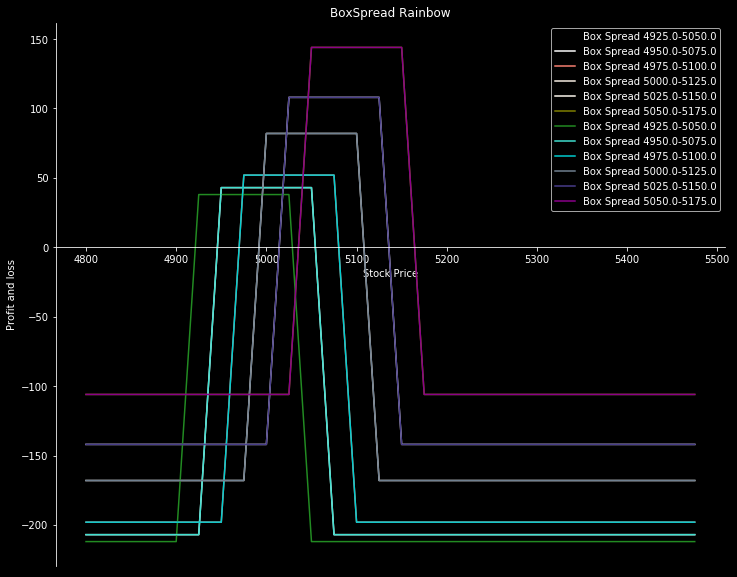

In [5]:
bss = BoxSpread.explorator(call.values(), put.values(), spread=50, gap=100)
g.profit_rainbow(bss, 'long', title='BoxSpread Rainbow')